In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('summary_results_r1.csv', index_col=0)

In [6]:
data

scennumb  nsites_train  intra  select  regression  idtrain  idtest  hm  \
0             6             2      1       0           0       12       1   0   
1             6             2      1       0           0       12       1   1   
2             6             2      1       0           0       12       1   0   
3             6             2      1       0           0       12       1   1   
4             6             2      1       0           0       12       1   1   
5             6             2      1       0           0       12       1   1   
6             6             2      1       0           0       12       1   1   
7             6             2      1       0           0       12       1   0   
8             6             2      1       0           0       12       1   0   
9             6             2      1       0           0       12       1   1   
10            6             2      1       0           0       12       1   1   
11            6             2      1       0           0       12       1   1   
12            6             2      1       0           0       12       1   1   
13            6             2      1       0           0       12       1   1   
14            6             2      1       0           0       12       1   1   
15            6             2      1       0           0       12       1   1   
16            6             2      1       0           0       12       1   1   
17            6             2      1       0           0       12       1   0   
18            6             2      1       0           0       12       1   1   
19            6             2      1       0           0       12       1   1   
20            6             2      1       0           0       12       1   0   
21            6             2      1       0           0       12       1   1   
22            6             2      1       0           0       12       1   0   
23            6             2      1       0           0       12       1   1   
24            6             2      1       0           0       12       1   1   
25            6             2      1       0           0       12       1   1   
26            6             2      1       0           0       12       1   1   
27            6             2      1       0           0       12       1   1   
28            6             2      1       0           0       12       1   1   
29            6             2      1       0           0       12       1   1   
...         ...           ...    ...     ...         ...      ...     ...  ..   
14366         1             1      1       1           0        4       4   0   
14367         1             1      1       1           0        4       4   1   
14368         1             1      1       1           0        4       4   1   
14369         1             1      1       1           0        4       4   0   
14370         1             1      1       1           0        4       4   1   
14371         1             1      1       1           0        4       4   1   
14372         1             1      1       1           0        4       4   1   
14373         1             1      1       1           0        4       4   0   
14374         1             1      1       1           0        4       4   0   
14375         1             1      1       1           0        4       4   1   
14376         1             1      1       1           0        4       4   0   
14377         1             1      1       1           0        4       4   0   
14378         1             1      1       1           0        4       4   1   
14379         1             1      1       1           0        4       4   1   
14380         1             1      1       1           0        4       4   0   
14381         1             1      1       1           0        4       4   1   
14382         1             1      1       1           0        4       4   0   
14383         1             1      1  

In [24]:
def get_stats(y_ref, y_pred, tp, tn):
    tp = tp.astype(float)
    tn = tn.astype(float)
    sensitivity = np.sum(tp) / np.sum(y_ref == 1)
    specificity = np.sum(tn) / np.sum(y_ref == 0)
    acc = np.mean(y_ref == y_pred)
    
    return acc, sensitivity, specificity

In [25]:
stats = data[(data['select']==1) & (data['nsites_train']==3) & (data['idtrain']==123)].values[:,[-4,-3,-2,-1]]

get_stats(stats[:,0],stats[:,1],stats[:,2], stats[:,3])

(0.65441176470588236, 0.68382352941176472, 0.625)

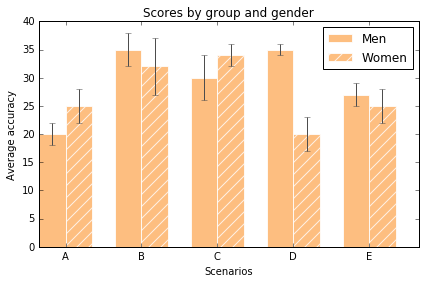

In [27]:

#import seaborn as sns
#sns.set_context("poster")#talk
#plt.figure(figsize=(8, 6))
new_style = {'grid': False}
plt.rc('axes', **new_style)
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='#fdae61',
                 edgecolor='#ffffff',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='#fdae61',
                 edgecolor='#ffffff',
                 hatch="//",
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Scenarios')
plt.ylabel('Average accuracy')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()